# Census Income Project


## Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Importing the required libraries:

In [590]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [591]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('census.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## EDA (Exploratory Data Analysis)

In [592]:
df.shape

(32560, 15)

We have 32560 rows and 15 columns including target variable in this dataset

In [593]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Income is our target column, Rest are independent columns

In [594]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
Fnlwgt            32560 non-null int64
Education         32560 non-null object
Education_num     32560 non-null int64
Marital_status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital_gain      32560 non-null int64
Capital_loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Native_country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [596]:
#lets check for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in this dataset

## Lets check the number of unique values in object column

In [597]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

Workclass 9
Education 16
Marital_status 7
Occupation 15
Relationship 6
Race 5
Sex 2
Native_country 42
Income 2


In [598]:
#Every column is having atlest 2 unquie values

In [599]:
#we can see that both education and education number columns are same
#only diffrence is education number column is label encoded
#so we can drop one of these column
df.loc[: ,['Education','Education_num']]

,Education,Education_num
0,Bachelors,13
1,HS-grad,9
2,11th,7
3,Bachelors,13
4,Masters,14
...,...,...
32555,Assoc-acdm,12
32556,HS-grad,9
32557,HS-grad,9
32558,HS-grad,9


In [600]:
#lets drop this column 
df.drop('Education_num',axis = 1,inplace = True)

## Data Visualization :

### Univariate Analysis :

#### Lets check for class imbalance problem

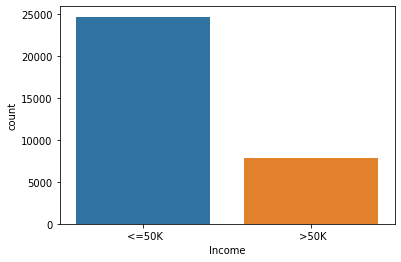

In [601]:
#lets check our traget variable for class imbalance problem
sns.countplot(x="Income",data=df)
plt.show()

From the above plot we can see there is a class imbalance problem in this dataset

In [602]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

we have 24719 people with less than 50 thousand income 

And we have 7841 people with more than 50 thousand income

### Bivariate Analysis with Target Variable

In [603]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

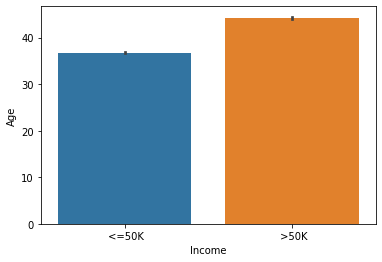

In [604]:
#Lets check this column againt our target variable
sns.barplot(x="Income",y ="Age",data=df)
plt.show()

In [605]:
#we can see that if the age is less than the income is also less
# Income of the  person increases with age

In [606]:
df.groupby('Income')['Age'].mean()

Income
 <=50K    36.783648
 >50K     44.249841
Name: Age, dtype: float64

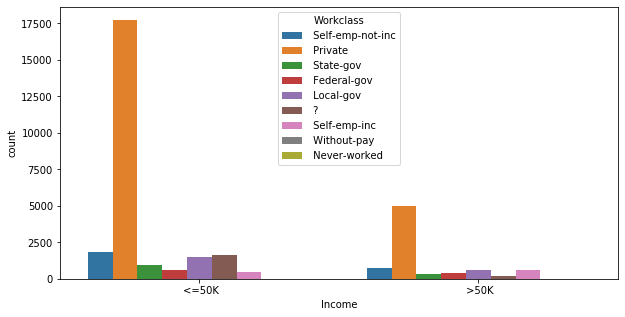

In [607]:
#Lets check this column againt our target variable
plt.figure(figsize=(10,5))
sns.countplot(x="Income",hue ="Workclass",data=df)
plt.show()

In [608]:
#we can see that people working in private sector and income less than 50K are very high
#People working in private sector with income above are also in the same ratio
#so basically people working private sector having high count in this dataset

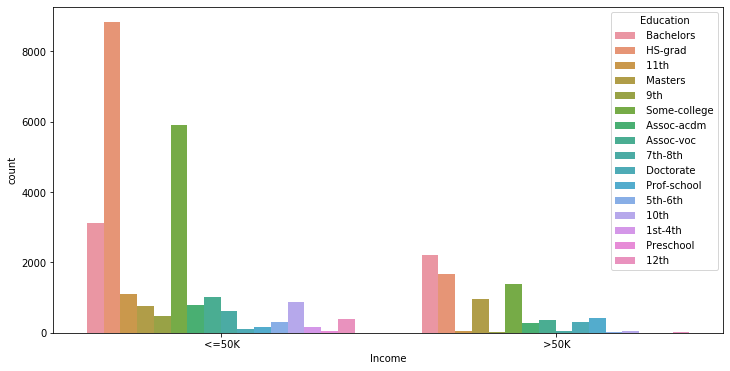

In [609]:
#Lets check this column againt our target variable
plt.figure(figsize=(12,6))
sns.countplot(x="Income",hue ="Education",data=df)
plt.show()

In [610]:
#we can see that count of people who is HS-grad  and Some-College having Income less than 50000 are high
#we can tell that high school graduates and college students have the probabality of having Income less than 50k.

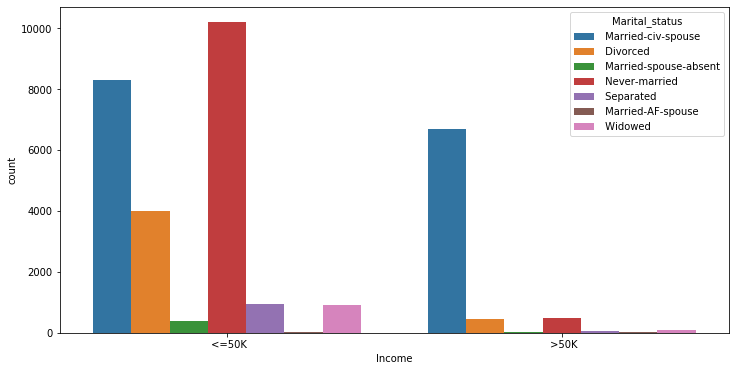

In [611]:
#Lets check this column againt our target variable
plt.figure(figsize=(12,6))
sns.countplot(x="Income",hue ="Marital_status",data=df)
plt.show()

In [612]:
#we can see that people whow are never married having probablity of havinf income less than 50K.
#because people who are never married are of less age , as we already saw with age column

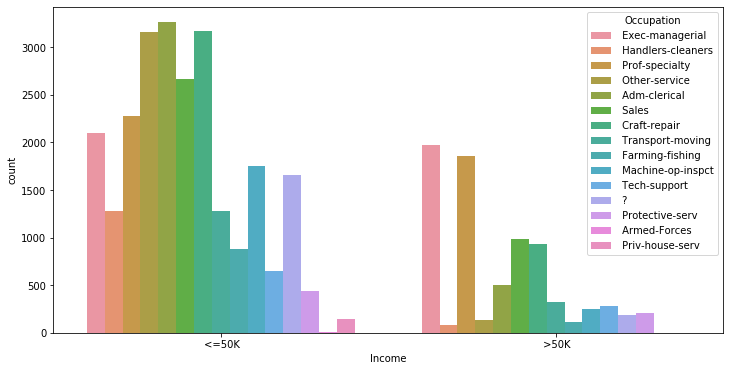

In [613]:
#Lets check this column againt our target variable
plt.figure(figsize=(12,6))
sns.countplot(x="Income",hue ="Occupation",data=df)
plt.show()

In [614]:
#people with other- service, ad-clerical,sales and craft repair occupation having 
#the probabality of having income less than 50K.

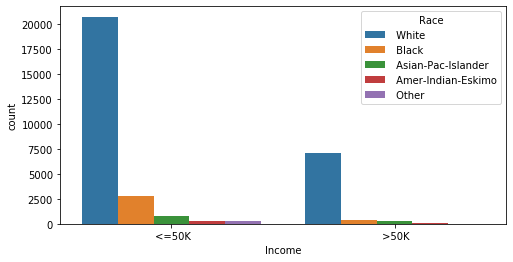

In [615]:
#Lets check this column againt our target variable
plt.figure(figsize=(8,4))
sns.countplot(x="Income",hue ="Race",data=df)
plt.show()

In [616]:
#white people are in same ratio in income less than 50K and more than 50K

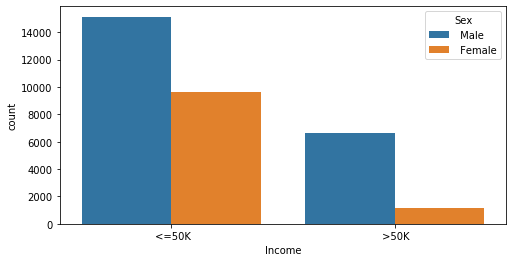

In [617]:
#Lets check this column againt our target variable
plt.figure(figsize=(8,4))
sns.countplot(x="Income",hue ="Sex",data=df)
plt.show()

In [618]:
#probaliity for males having Income more 50K is high
#ratio of Income more than 50K is 4:1 for male:female

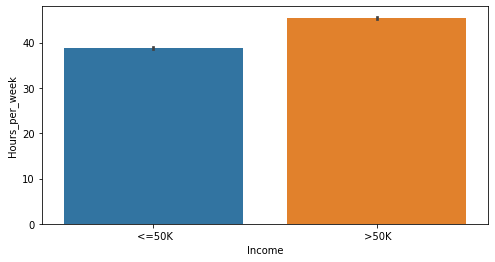

In [619]:
#Lets check this column againt our target variable
plt.figure(figsize=(8,4))
sns.barplot(x="Income", y ="Hours_per_week",data=df)
plt.show()

In [620]:
#we can see that people who more hours per week having Income more than 50K

In [621]:
df.groupby('Income')['Hours_per_week'].mean()

Income
 <=50K    38.840163
 >50K     45.473026
Name: Hours_per_week, dtype: float64

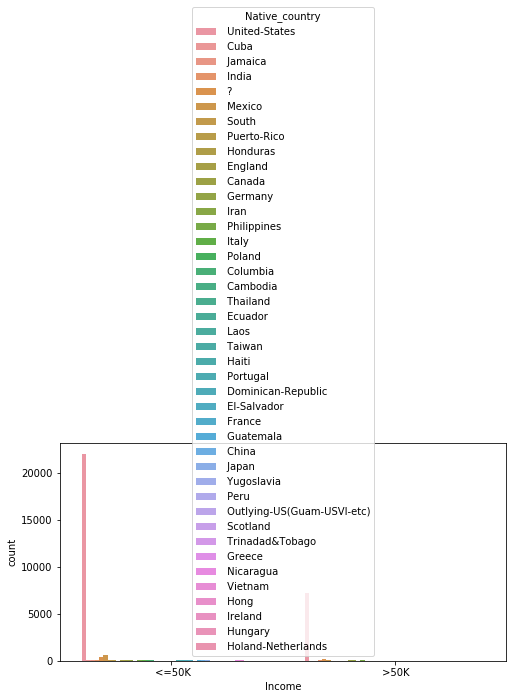

In [622]:
#Lets check this column againt our target variable
plt.figure(figsize=(8,4))
sns.countplot(x="Income",hue ="Native_country",data=df)
plt.show()

In [623]:
#we can see that most of the people are from US

In [624]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

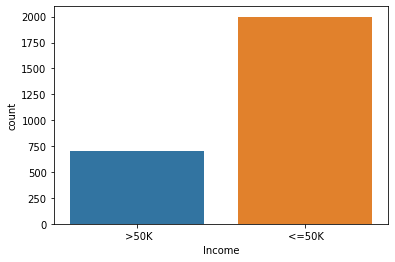

In [625]:
#we can see that even if a highscool graduate work morw 40 hour a week, still his income is less than 50k.
sns.countplot(x="Income",data=df.loc[(df["Hours_per_week"]>40)&(df['Education']== ' HS-grad')])
plt.show()

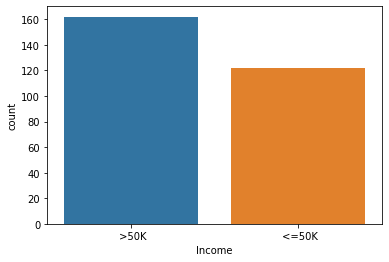

In [626]:
#we can see that  if a wife work more 40 hour a week, Her income will be more than 50k.
sns.countplot(x="Income",data=df.loc[(df["Hours_per_week"]>40)&(df['Relationship']== ' Wife')])
plt.show()

## Data Preprocessing

### Target Column

In [627]:
#Lets convert our target variable first
pd.unique(df.Income)

array([' <=50K', ' >50K'], dtype=object)

In [628]:
#encoding the target column using this function
def target_column(x):
    if x == ' <=50K':
        return 0
    else:
        return 1

In [629]:
#calling the above function
df['Income'] = df['Income'].apply(target_column)

In [630]:
df['Income'].unique()

array([0, 1], dtype=int64)

In [631]:
df.Income.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

pd.get_dummies(data = df , columns = ['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country'])

x = []
for i in df.columns:
    if df[i].dtype =='object':
        x.append(i)
x

### Native_country column

In [632]:
#we can see that in native counrty column 29169 rows are united states among 32560 rows
us = len(df.loc[df.Native_country == ' United-States'])
us

29169

In [633]:
df.shape

(32560, 14)

In [634]:
29169/32560

0.8958538083538083

In [635]:
#almost 90% of the people are from us, so we can consider people from us as 1 and other contry as 0
def contry(x):
    if x == ' United-States':
        return 1
    else:
        return 0

In [636]:
df['Native_country'] = df['Native_country'].apply(contry)

In [637]:
df.Native_country.value_counts()

1    29169
0     3391
Name: Native_country, dtype: int64

### Education, Occupation and Workclass columns

In [638]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [639]:
#we can convert these columns with ordinal encoding since , we have some order in education, occupation and workclass
#lets use ordinal encoding for other variables
collist = ['Workclass','Education','Occupation']
o_encoding = OrdinalEncoder()

for i in collist:
    if df[i].dtypes == 'object':
        df[i] = o_encoding.fit_transform(df[i].values.reshape(-1,1))

### Relationship, Race , Sex and  Marital_status columns

In [640]:
#Sinve these are nominal columns we can use onehot encoding for these columns

df = pd.get_dummies(data= df , columns = ['Relationship', 'Race', 'Sex','Marital_status'])

In [641]:
df.dtypes

Age                                        int64
Workclass                                float64
Fnlwgt                                     int64
Education                                float64
Occupation                               float64
Capital_gain                               int64
Capital_loss                               int64
Hours_per_week                             int64
Native_country                             int64
Income                                     int64
Relationship_ Husband                      uint8
Relationship_ Not-in-family                uint8
Relationship_ Other-relative               uint8
Relationship_ Own-child                    uint8
Relationship_ Unmarried                    uint8
Relationship_ Wife                         uint8
Race_ Amer-Indian-Eskimo                   uint8
Race_ Asian-Pac-Islander                   uint8
Race_ Black                                uint8
Race_ Other                                uint8
Race_ White         

Now all our data is either Float are int datatypes

## Outliers Removal for numerical columns

In [642]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Occupation', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income',
       'Relationship_ Husband', 'Relationship_ Not-in-family',
       'Relationship_ Other-relative', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife',
       'Race_ Amer-Indian-Eskimo', 'Race_ Asian-Pac-Islander', 'Race_ Black',
       'Race_ Other', 'Race_ White', 'Sex_ Female', 'Sex_ Male',
       'Marital_status_ Divorced', 'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent',
       'Marital_status_ Never-married', 'Marital_status_ Separated',
       'Marital_status_ Widowed'],
      dtype='object')

In [643]:
#These are the only numerical columns in our dataset
Numerical_columns = ['Age','Fnlwgt','Hours_per_week']

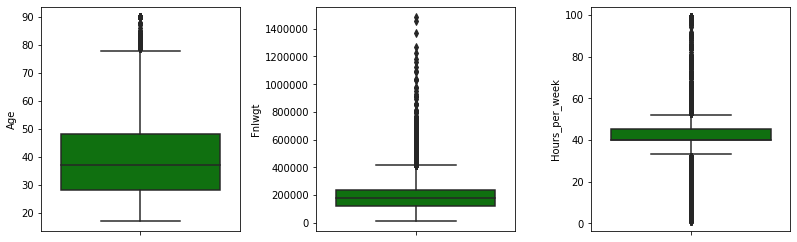

In [644]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 4
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

We can see multiple outliers in all the these columns

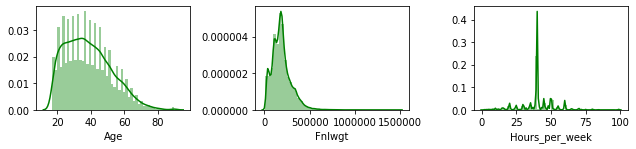

In [645]:
# Lets check the distribution
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

Data is very much right skewed for thses three columns

In [646]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [647]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [648]:
#Lets remove Outliers using IQR3 methods since the data is not normally ditributed
Numerical_columns = ['Age','Fnlwgt','Hours_per_week']
for i in Numerical_columns:
    outliers_IQR3(df,i)

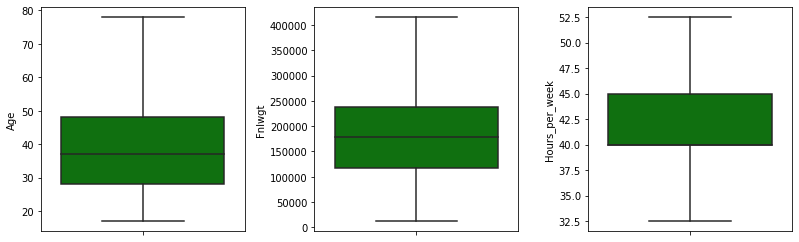

In [649]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 4
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

In [650]:
#outliers have been removed for the above columns

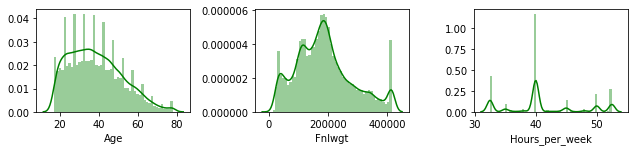

In [651]:
# Lets check the distribution
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [652]:
#noe the data is almost normal distributed for these columns

## Skewness reduction

In [653]:
#Lets check skewness for the below numerical columns
Numerical_columns

['Age', 'Fnlwgt', 'Hours_per_week']

In [654]:
for i in Numerical_columns:
    print(i, df[i].skew())

Age 0.5138826245662368
Fnlwgt 0.5482852471836978
Hours_per_week 0.43827412709412583


Skewness is almost in negligable range, so we can ignore it

### Splitting X and Y columns

In [655]:
#lets split our train and test data
Y = df['Income']
X = df.drop('Income',axis = 1)

In [656]:
Y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

## Handling class Imbalance problem using SMOT method

In [657]:
#To install imbalanced-learn library use "pip install imbalanced-learn" command
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, Y)

y_sm.value_counts()

1    24719
0    24719
Name: Income, dtype: int64

In [658]:
#now our class imbalnace problem is sloved

## Lets Check for Best Random State 

In [659]:
maxaccu = 0
rand_state = 0
for i in range(42,100):

    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= i,stratify= y_sm )
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        rand_state = i
print('Best accuracy is {} on random state {}'.format(maxaccu,rand_state))

Best accuracy is 0.6809782109037419 on random state 68


In [660]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 68


In [661]:
#now we don't have the class imbalance problem
y_train.value_counts()

0    19281
1    19280
Name: Income, dtype: int64

In [662]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= rand_state )

In [663]:
#now we don't have the class imbalance problem
y_train.value_counts()

0    19315
1    19246
Name: Income, dtype: int64

## Model selection:

In [664]:
#lets Choose Among this Models
lg = LogisticRegression()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
#ensemble technique
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [665]:
model_list = [lg,dtc,knn,rf,ada]
least_diffrence = []
for m in model_list:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x_sm,y_sm,cv =5)
    print("cross val score :",  cv.mean())
    diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
    a = 'diffrence b/w accurancy score and cross val score is : {:.2f}'.format(diffrence)
    print(a)
    least_diffrence.append((m,a))
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



LogisticRegression()
[[5065  339]
 [3733 1740]]
              precision    recall  f1-score   support

           0       0.58      0.94      0.71      5404
           1       0.84      0.32      0.46      5473

    accuracy                           0.63     10877
   macro avg       0.71      0.63      0.59     10877
weighted avg       0.71      0.63      0.59     10877

The accuracy of LogisticRegression() is 0.6256320676657167
cross val score : 0.6291914532272936
diffrence b/w accurancy score and cross val score is : 0.00
f1 score for 0 is 0.7132798197436981 
f1 score for 1 is 0.46080508474576265 


DecisionTreeClassifier()
[[4644  760]
 [ 744 4729]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5404
           1       0.86      0.86      0.86      5473

    accuracy                           0.86     10877
   macro avg       0.86      0.86      0.86     10877
weighted avg       0.86      0.86      0.86     10877

The accur

In [666]:
#lets check the diffrence between cross val score and accuracy score of ecah model
least_diffrence

[(LogisticRegression(),
  'diffrence b/w accurancy score and cross val score is : 0.00'),
 (DecisionTreeClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.01'),
 (KNeighborsClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.00'),
 (RandomForestClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.02'),
 (AdaBoostClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.02')]

In [667]:
#since four of our models are having diffrence of 0.01 which is very close,so there is no overfitting in any of the model
#Lets choose model with most accuracy
#Random forest is having hishest accurancy of 90%
#so lets choose arndom forest as our final model

## Hyperparameter Tuning:

In [668]:
#lets create the parameter list to pass in GridsearchCv
parameters = {'criterion' : ['gini','entropy'] ,'max_depth' : [3,4,5,6,7,8,10,25]
             ,'min_samples_split':[2,5,8,10,12,18],'max_features':['auto','sqrt'],'min_samples_leaf':[1,3,5,7,9]}

In [669]:
gsv = RandomizedSearchCV(estimator= rf , param_distributions=parameters,cv =5)
gsv.fit(x_train,y_train) 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18]})

In [670]:
gsv.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'gini'}

we got our best parameters after Hyperparameter tuning {'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'gini'}

## Creating a Final Model as Random Forest Classifier

In [671]:
final_model = RandomForestClassifier(criterion='gini',max_depth=25,max_features='sqrt',min_samples_leaf=3,min_samples_split=10)
#final_model =RandomForestClassifier()
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
accu =accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy of {} is {}'.format(final_model,accu))
cv = cross_val_score(final_model,x_sm,y_sm,cv =5)
print('\n')
print("cross val score :",  cv.mean())
diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
least_diffrence.append((final_model,diffrence))
print('\n')
print('diffrence b/w accurancy score and cross val score is :',diffrence)
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))

[[4913  491]
 [ 568 4905]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      5404
           1       0.91      0.90      0.90      5473

    accuracy                           0.90     10877
   macro avg       0.90      0.90      0.90     10877
weighted avg       0.90      0.90      0.90     10877

The accuracy of RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=10) is 0.9026385952008826


cross val score : 0.8875179107245204


diffrence b/w accurancy score and cross val score is : 0.015120684476362278
f1 score for 0 is 0.9027101515847495 
f1 score for 1 is 0.902566933480541 


In [672]:
#We got our accurancy as 90% in random forest classifer, F1 score is alos same for both 0 and 1

## Saving the model:

In [673]:
#serialization using joblib
import joblib
joblib.dump(final_model,'Census_Income.obj')

['Census_Income.obj']

In [674]:
Census_Income = joblib.load('Census_Income.obj')

In [675]:
accuracy_score(Census_Income.predict(x_test),y_test)

0.9026385952008826

## AUC ROC curve :

In [676]:
#Since we have Random forest classifer as our final , lets check out the auc roc curve and score

In [677]:
final_model.score(x_train,y_train)

0.9241720909727444

In [678]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]

In [679]:
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

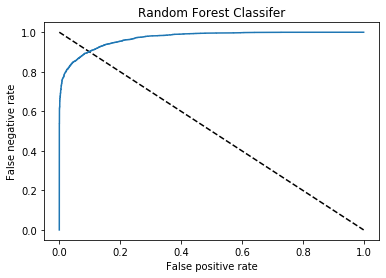

In [680]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Random Forest Classifer')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('Random Forest Classifer')
plt.show()

In [681]:
roc_auc_score(pred,y_test)

0.9026879736441098

## Conclusion

In [682]:
conclusion = pd.DataFrame((Census_Income.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

90% of our answers are correct and also model is not overfitted